### What is Geopandas
GeoPandas is an open-source Python library that makes working with geospatial data in pandas easier. 

Geospatial data refers to any data that has a geographic location component.

https://geopandas.org/en/stable/getting_started/introduction.html

#### Data Structures
GeoPandas implements two main data structures, a GeoSeries and a GeoDataFrame. These are subclasses of pandas.Series and pandas.DataFrame, respectively.

#### GeoSeries
A GeoSeries is a special type of Pandas Series designed to store geometric shapes — such as points, lines, or areas — instead of just plain text or numbers.

Each row (entry) in a GeoSeries holds one shape — for example:
- A Point: Think of a pin on Google Maps. Example: The exact location of a hospital or shop.
- A Polygon: Represents an enclosed area on the map.e.g A country, park, or lake boundary.
- A LineString: Represents a path or route.e.g A road, river, or hiking trail.

Each row in the GeoSeries can hold either a single shape, or a collection of shapes.

You can have MultiPoints, MultiPolygons, or MultiLineStrings.

#### GeoDataFrame
- A GeoDataFrame is a tabular data structure that contains a GeoSeries. It's like a normal pandas dataframe but with geometry attached to it. 
- The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status - the “active geometry column”.
- A GeoDataFrame may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time.

### Getting Geospatial Datasets
GeoPandas supports many geospatial file types and makes it easy to read and visualize them.

#### Common Dataset Formats
- Shapefile (.shp) – Standard GIS format for vector data.
- GeoJSON – JSON format for encoding geographic data.
- KML – Used by Google Earth.(Keyhole Markup Language)
- GPKG (GeoPackage) – Modern SQLite-based format.
- CSV – Can be converted to GeoDataFrame if it has latitude and longitude columns.

#### What is a Shapefile?
A shapefile is a popular file format used for storing geographic vector data—such as points (e.g., cities), lines (e.g., roads), and polygons (e.g., country borders).

A shapefile is not a single file but a group of files that work together. The most common ones are:

- .shp: the main file that contains geometry 
- .shx: an index file - makes the shape file faster
- .dbf: database (like a table of information), name, population, GDP
- .prj: projection (coordinate system info)

These files must be kept together in the same directory.

#### Geopandas Libraries

- Shapely is a Python library used for manipulating and analyzing geometric objects —  Built on top of GEOS
- fiona - reading and writing files, geojson
- pyproj - cartographic projections
- descartes - mapping
- geopy - geocoding
- rtree - Spatial analysis
- pysal - more advanced analysis, coloring maps

In [155]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

Natural Earth is a public domain map dataset that provides high-quality, free-to-use geospatial data for making maps and conducting geographic analysis.
Link to dataset: https://www.naturalearthdata.com/

In [92]:
# Load the shapefile
world = gpd.read_file("world_countries/ne_10m_admin_0_countries.shp")

# Show the first few rows
print(world.head())

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...      None       None      None   
1  Sovereign country   1   Malaysia  ...      None       None      None   
2  Sovereign country   1      Chile  ...      None       None      None   
3  Sovereign country   1    Bolivia  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

| Column      | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| featurecla  | Feature class — describes the feature type, like "Admin-0 country" (country-level boundary). |
| scalerank   | Rank for map generalization; lower = more important (for display at small scales). |
| LABELRANK   | Rank used for labeling features in maps — lower = higher priority.          |
| SOVEREIGNT  | The sovereign nation name (e.g., "Indonesia").                              |
| SOV_A3      | 3-letter country code for the sovereign nation (e.g., "IDN").               |
| ADM0_DIF    | Indicates if ADMIN and SOVEREIGNT differ. 0 = same, 1 = different.          |
| LEVEL       | Administrative level — 2 usually means country-level (Admin-0).             |
| TYPE        | Type of entity — often "Sovereign country" or "Disputed".                   |
| TLC         | Could indicate territory label category (less commonly used).               |
| ADMIN       | Official administrative name of the country.                                |

<Axes: >

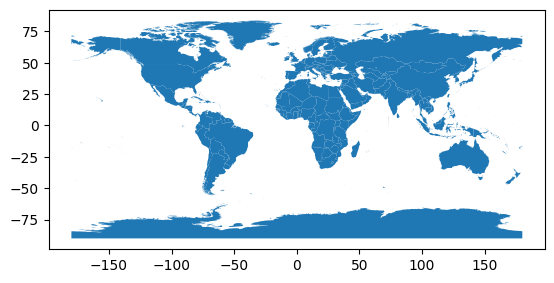

In [ ]:
# plot the world map
# Longitude → X column
# Latitude → Y column
world.plot()

In [94]:
# Check the type
print(type(world)) 

<class 'geopandas.geodataframe.GeoDataFrame'>


In [95]:
# View columns
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


#### Accessing the Geometry Column

In [96]:
# Access geometry
world.geometry.head()

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [139]:
world.geometry.extract_unique_points()

0      MULTIPOINT ((117.70361 4.16341), (117.70361 4....
1      MULTIPOINT ((117.70361 4.16341), (117.69711 4....
2      MULTIPOINT ((-69.51009 -17.50659), (-69.50611 ...
3      MULTIPOINT ((-69.51009 -17.50659), (-69.51009 ...
4      MULTIPOINT ((-69.51009 -17.50659), (-69.63832 ...
                             ...                        
253    MULTIPOINT ((113.5586 22.16303), (113.56943 22...
254    MULTIPOINT ((123.59702 -12.42832), (123.59775 ...
255    MULTIPOINT ((-79.98929 15.79495), (-79.98782 1...
256    MULTIPOINT ((-78.63707 15.86209), (-78.64041 1...
257    MULTIPOINT ((117.75389 15.15437), (117.75569 1...
Length: 258, dtype: geometry

<Axes: >

<Figure size 1000x800 with 0 Axes>

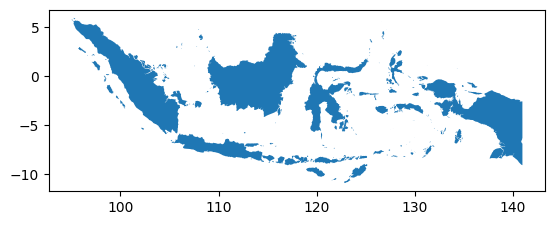

In [142]:
# Access a specific geometry
# Select the first country's shape
country_shape = world.geometry.iloc[0]
# Create a larger plot
plt.figure(figsize=(10, 8))  
# Plot the shape using a GeoSeries
gpd.GeoSeries([country_shape]).plot()

#### Activity 1: Country Geometry Viewer

- Pick a country from the GeoDataFrame.
- Access and plot its shape.

In [113]:
world['ADMIN'].unique()  # Unique country names

array(['Indonesia', 'Malaysia', 'Chile', 'Bolivia', 'Peru', 'Argentina',
       'Dhekelia Sovereign Base Area', 'Cyprus', 'India', 'China',
       'Israel', 'Palestine', 'Lebanon', 'Ethiopia', 'South Sudan',
       'Somalia', 'Kenya', 'Malawi', 'United Republic of Tanzania',
       'Syria', 'Somaliland', 'France', 'Suriname', 'Guyana',
       'South Korea', 'North Korea', 'Morocco', 'Western Sahara',
       'Costa Rica', 'Nicaragua', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'Bhutan', 'Ukraine', 'Belarus',
       'Namibia', 'South Africa', 'Saint Martin', 'Sint Maarten', 'Oman',
       'Uzbekistan', 'Kazakhstan', 'Tajikistan', 'Lithuania', 'Brazil',
       'Uruguay', 'Mongolia', 'Russia', 'Czechia', 'Germany', 'Estonia',
       'Latvia', 'Norway', 'Sweden', 'Finland', 'Vietnam', 'Cambodia',
       'Luxembourg', 'United Arab Emirates', 'Belgium', 'Georgia',
       'North Macedonia', 'Albania', 'Azerbaijan', 'Kosovo', 'Turkey',
       'Spain', 'Laos', 'Kyrgyzsta

<Axes: >

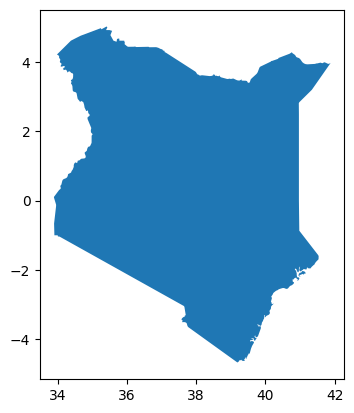

In [116]:
#Example: Select Kenya
kenya = world[world['ADMIN'] == 'Kenya']
kenya.plot()

#### Top 10 countries in Africa based on GDP

<Axes: >

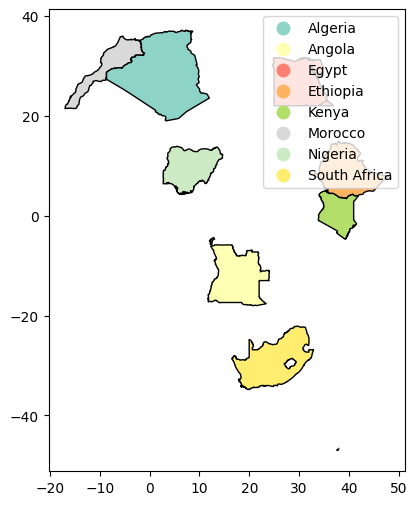

In [153]:
# List of countries to filter
countries = ['South Africa', 'Egypt', 'Algeria', 'Nigeria', 'Ethiopia',
              'Morocco', 'Kenya', 'Angola', "Côte d'Ivoire", 'Tanzania']

# Filter GeoDataFrame using the 'ADMIN' column
selected_countries = world[world['ADMIN'].isin(countries)]

# Plot the filtered countries
selected_countries.plot(column= 'ADMIN', edgecolor='black', cmap='Set3', figsize=(8, 6), legend=True)

 #### Activity 2: Geometry Type Checker
 Check the type of geometries in the dataset.

In [99]:
world.geom_type.value_counts()

MultiPolygon    151
Polygon         107
Name: count, dtype: int64

### Customizing map styles with geopandas

<Axes: >

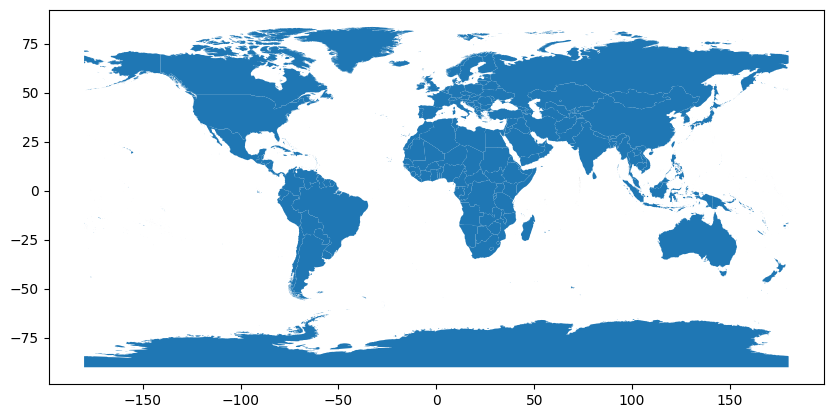

In [147]:
world.plot(figsize=(10,5))

(np.float64(-197.99999999999991),
 np.float64(198.0),
 np.float64(-98.68170503264994),
 np.float64(92.31580568565008))

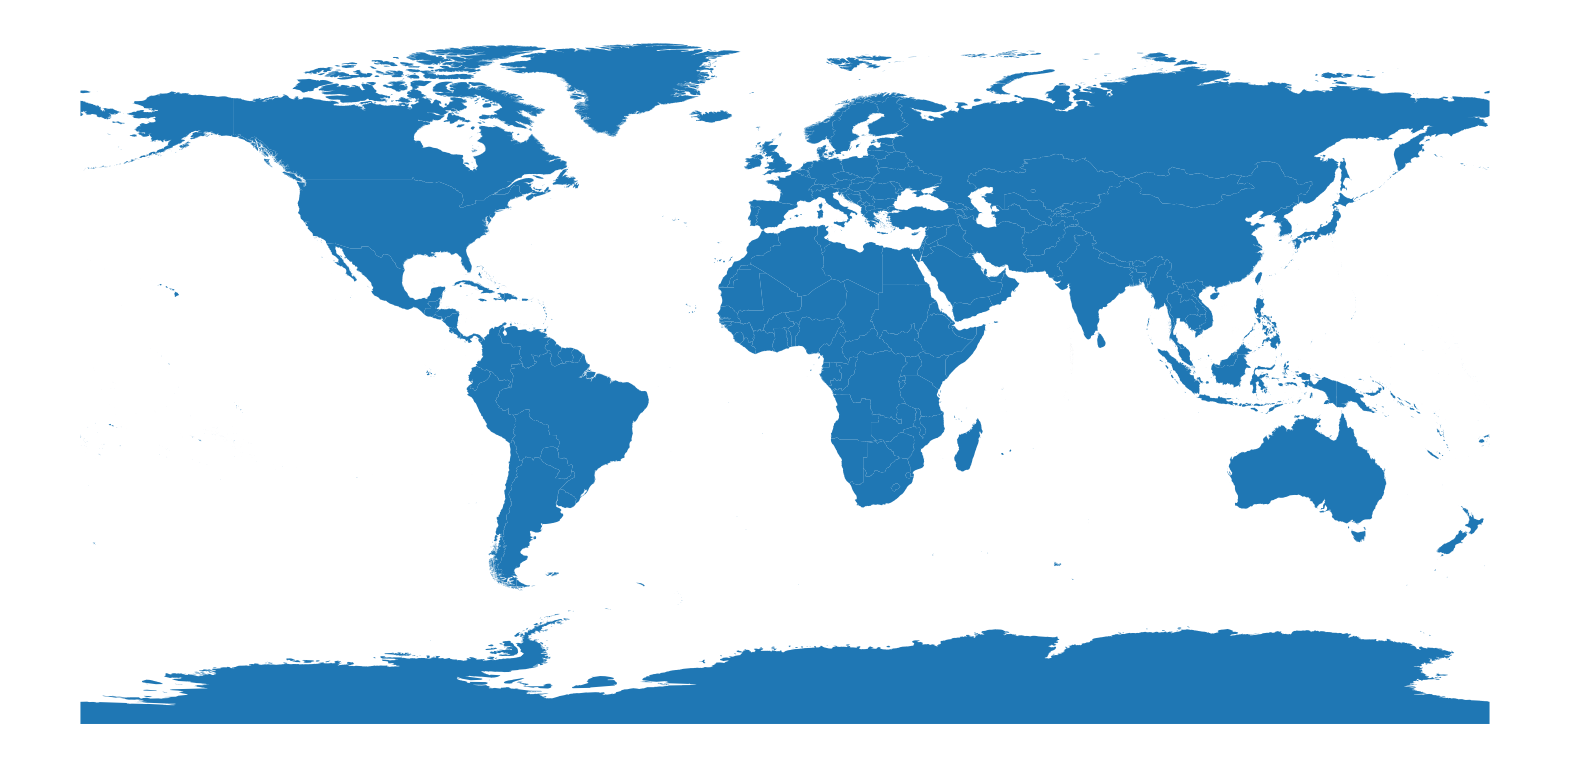

In [122]:
ax = world.plot(figsize=(20,20))
ax.axis('off')

(np.float64(-197.99999999999991),
 np.float64(198.0),
 np.float64(-98.68170503264994),
 np.float64(92.31580568565008))

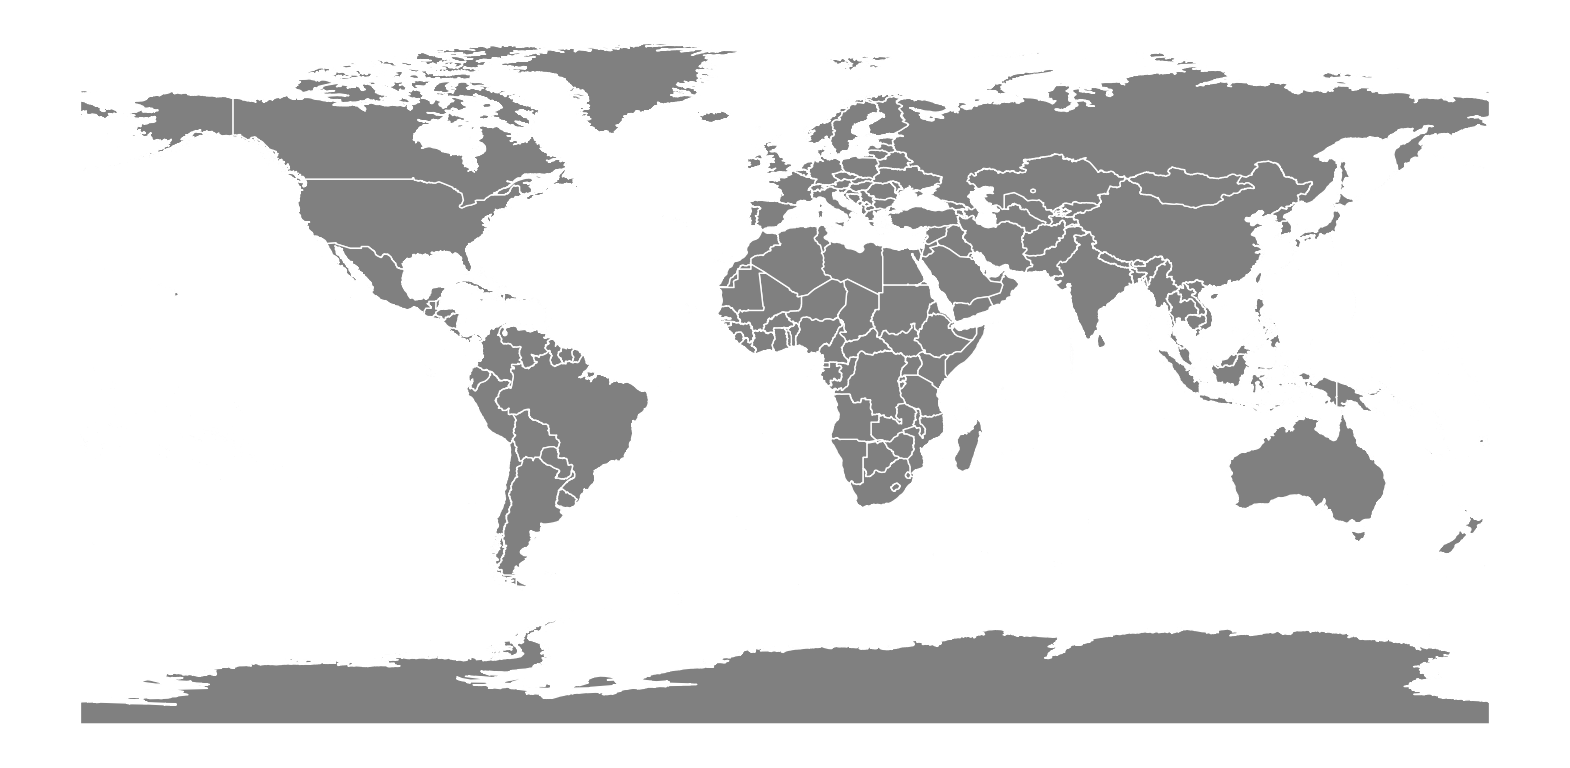

In [123]:
#coloring maps
# 1.fill - inside
# 2.edge - outline
ax = world.plot(figsize=(20,20), color = 'grey', edgecolor='white')
ax.axis('off')

(np.float64(-197.99999999999991),
 np.float64(198.0),
 np.float64(-98.68170503264994),
 np.float64(92.31580568565008))

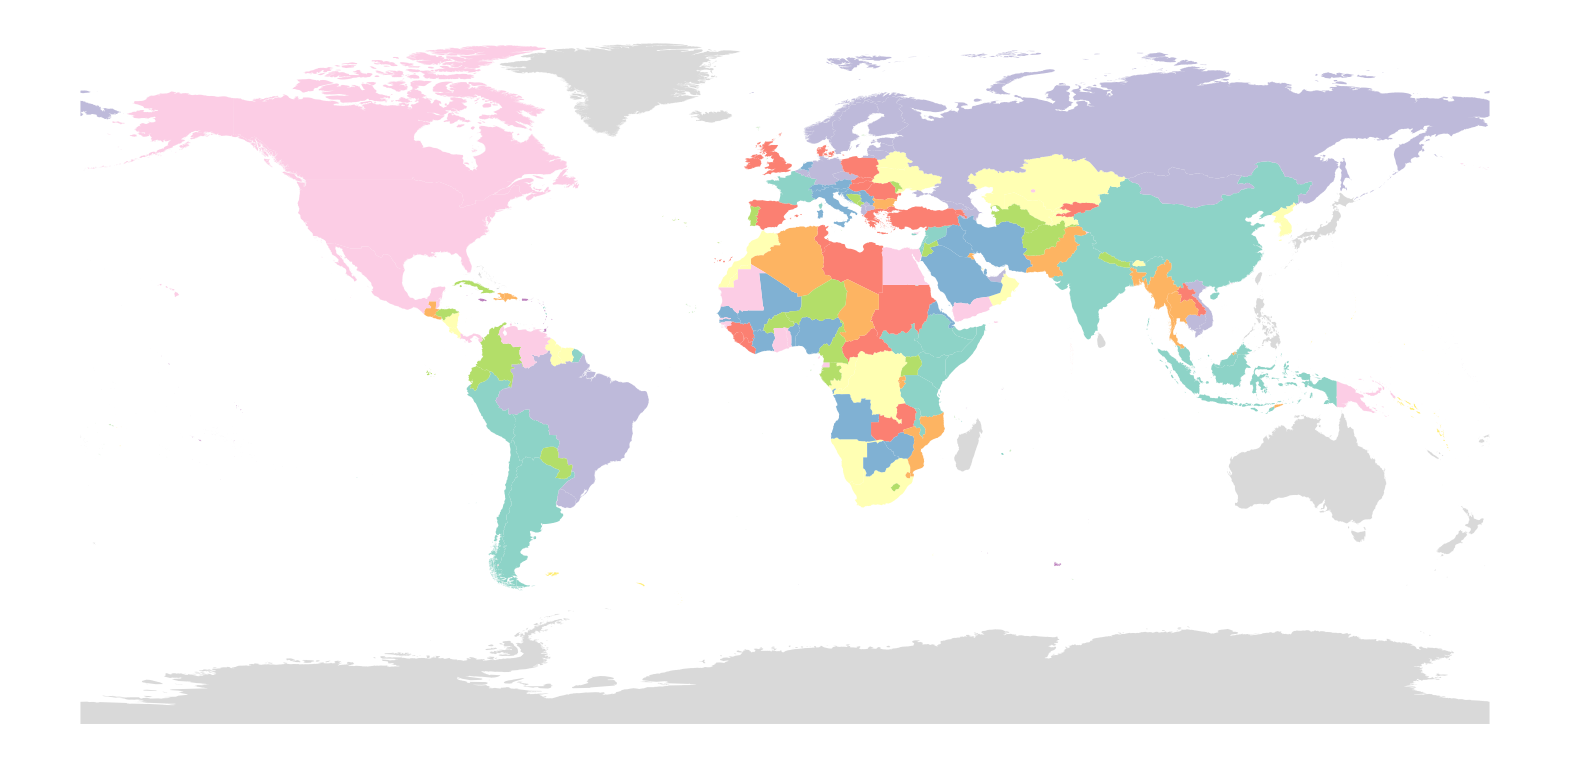

In [154]:
ax = world.plot(figsize=(20,20), cmap= 'Set3')
ax.axis('off')

(np.float64(-197.99999999999991),
 np.float64(198.0),
 np.float64(-98.68170503264994),
 np.float64(92.31580568565008))

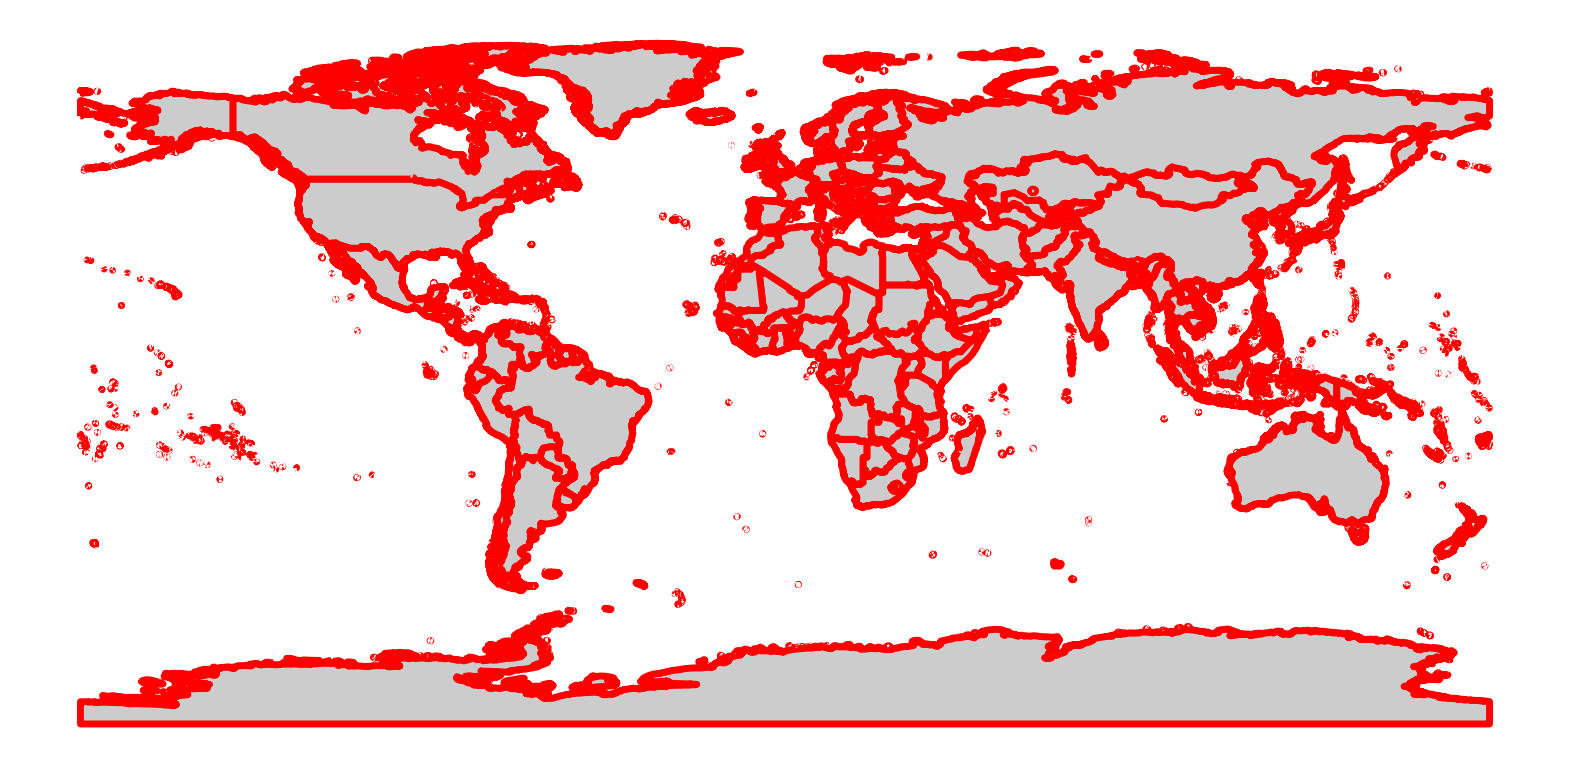

In [126]:
ax = world.plot(figsize=(20,20), color = '#CCCCCC', edgecolor='#FF0000', linewidth=5)
ax.axis('off')

(np.float64(-197.99999999999991),
 np.float64(198.0),
 np.float64(-98.68170503264994),
 np.float64(92.31580568565008))

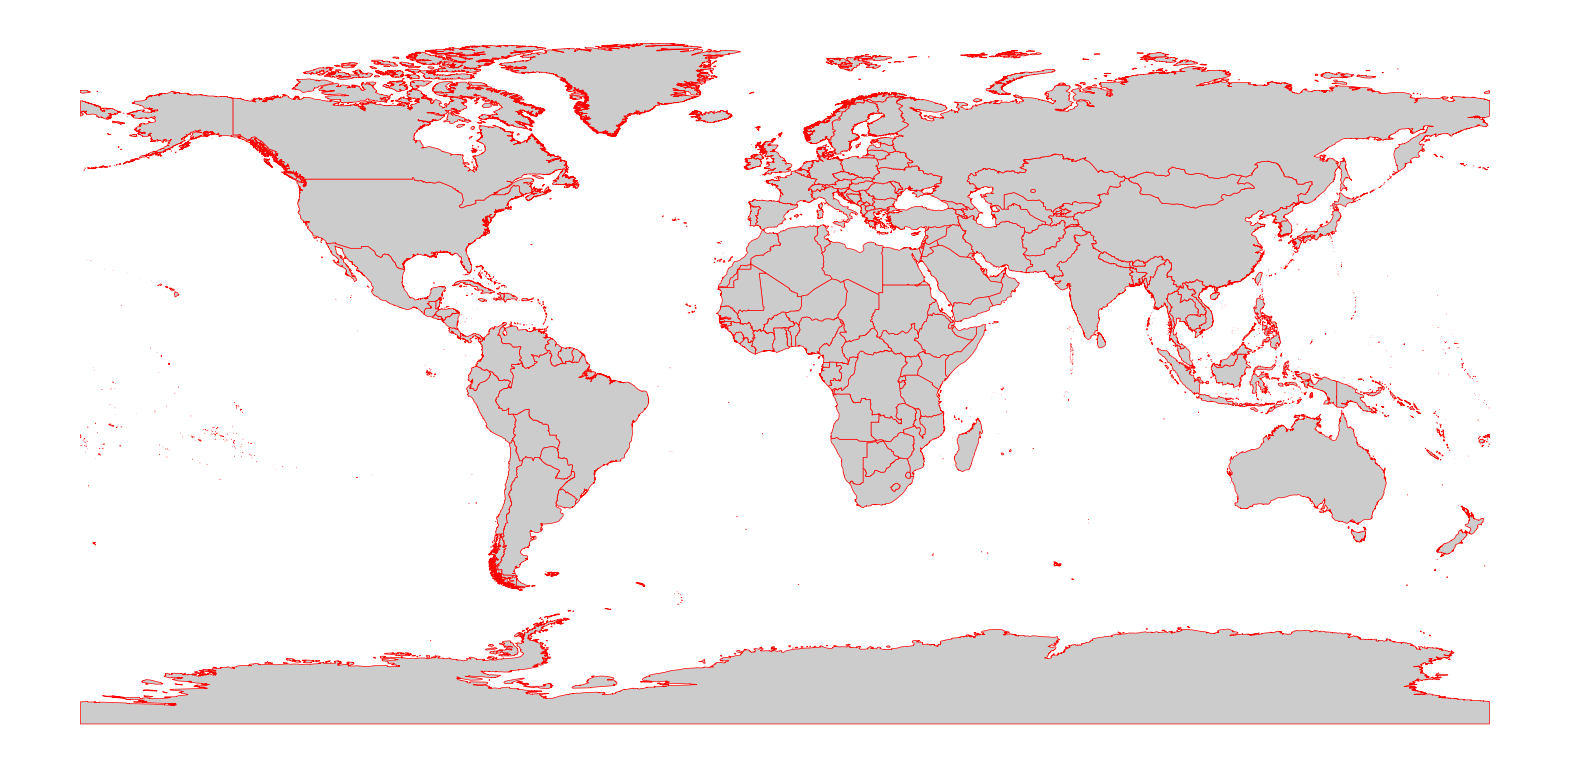

In [128]:
ax = world.plot(figsize=(20,20), color = '#CCCCCC', edgecolor='#FF0000', linewidth=0.5)
ax.axis('off')

### Mapping and plotting tools

GeoPandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.

link to data: https://github.com/geopandas/geodatasets/blob/main/geodatasets/json/database.json

In [156]:
import geodatasets

In [70]:
# geoda is a namespace used by the geodatasets library, which provides sample geospatial datasets
#chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
#groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))
airbnb = gpd.read_file(geodatasets.get_path("geoda.airbnb"))

In [75]:
#chicago.head()
airbnb.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,"POLYGON ((-87.6288 41.80189, -87.62879 41.8017..."
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,"POLYGON ((-87.60671 41.81681, -87.6067 41.8165..."
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


<Axes: >

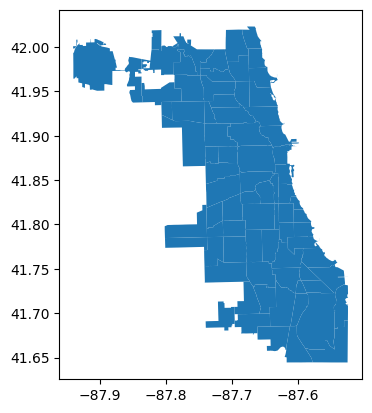

In [72]:
airbnb.plot()

#### Choropleth maps
GeoPandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable).

Simply use the plot command with the column argument set to the column whose values you want used to assign colors.

<Axes: >

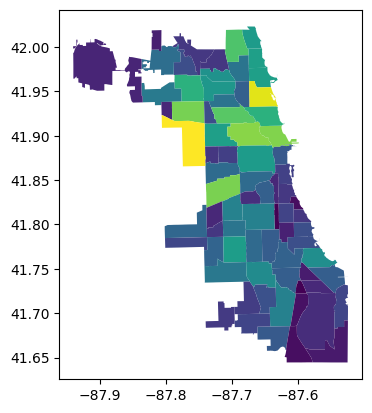

In [76]:
#Plot by population
airbnb.plot(column="population")

### Creating a legend
When plotting a map, we can enable a legend using the legend argument:

<Axes: >

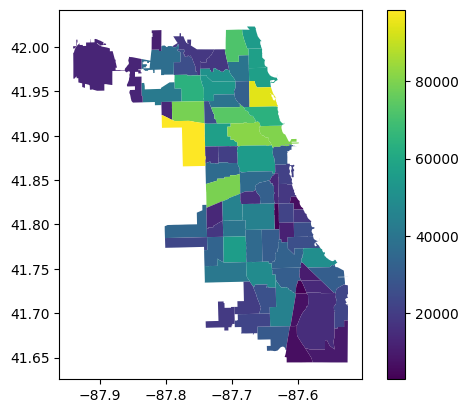

In [77]:
#Plot population estimates with an accurate legend
airbnb.plot(column='population', legend=True)

<Axes: >

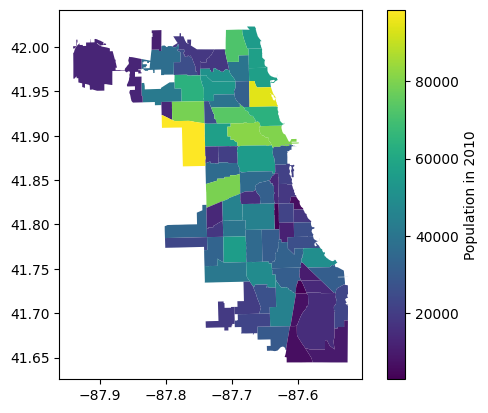

In [ ]:
# adds its label using using legend_kwds
airbnb.plot(
    column="population",
    legend=True,
    legend_kwds={"label": "Population in 2010", "orientation": "horizontal"},
)

### Choosing colors
- You can also modify the colors used by plot() with the cmap option. 
- For a full list of colormaps, https://matplotlib.org/stable/users/explain/colors/colormaps.html.

<Axes: >

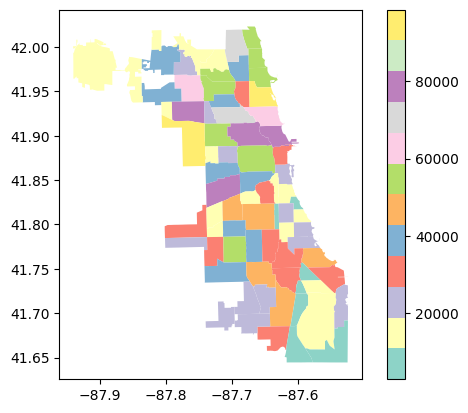

In [211]:
airbnb.plot(column='population', cmap='Set3', legend=True)

<Axes: >

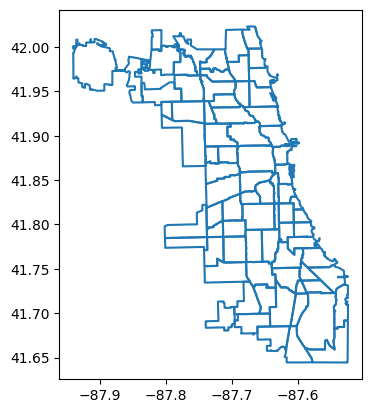

In [213]:
# To make the color transparent for when you just want to show the boundary,
#chicago.plot(facecolor="none", edgecolor="black")
#airbnb.plot(facecolor="none")
airbnb.boundary.plot()

### choropleth classification schemes

Data classification is the process of grouping continuous or numeric data into discrete categories (or classes) so that they can be visually represented with different colors or shades in a choropleth map.

In libraries like GeoPandas and matplotlib, when you create a choropleth map, you can use the scheme option (powered by the mapclassify package) to control how the values are divided into color bins.

#### Examples of Classification Schemes (`mapclassify`)

Some common classification schemes available via `mapclassify`:

| Scheme           | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `equal_interval` | Divides data range into equal-sized intervals.                             |
| `quantiles`      | Each class contains the same number of observations.                       |               |
| `box_plot`       | Based on quartiles and outliers, like in a box plot.                       |
| `std_mean`       | Classification based on standard deviations from the mean.                |
| `fisher_jenks`   | Minimizes variance within classes, maximizes variance between classes.     |


<Axes: >

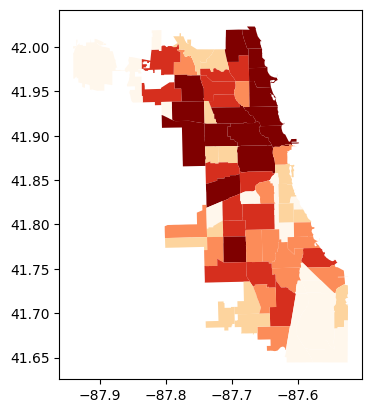

In [100]:
airbnb.plot(column='population', cmap='OrRd', scheme='quantiles')

### Interactive mapping

Geopandas can create interactive maps based on the folium library.

pip install folium branca

- Folium: Folium is a Python library that enables the creation of interactive maps, leveraging the capabilities of the Leaflet JavaScript library.
- Branca: A helper library used by Folium to handle tooltips, legends, color maps, and popups.





In [160]:
import folium

In [214]:
# Load the Atlanta homicide dataset using its registered name
atlanta = gpd.read_file(geodatasets.get_path("geoda.atlanta"))

In [215]:
# View the first few rows
atlanta.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,HR7983,HR8587,...,PO7983,PO8587,PO8995,PE77,PE82,PE87,RDAC80,RDAC85,RDAC90,geometry
0,Cherokee,North Carolina,37,039,37039,37,39,37039,6.298816,6.742065,...,95256,59329,144758,2.933480,1.605377,1.922455,0.897757,0.444341,0.134578,"POLYGON ((-84.29104 35.21054, -84.22594 35.261..."
1,Polk,Tennessee,47,139,47139,47,139,47139,13.271204,9.629968,...,67816,41537,97210,4.422696,3.994711,3.833682,-0.012454,-0.140179,-0.192610,"POLYGON ((-84.29104 35.21054, -84.32385 34.989..."
2,Oconee,South Carolina,45,073,45073,45,73,45073,14.174115,6.246720,...,246929,160084,413465,3.716055,3.635228,3.789255,-0.168537,-0.311719,-0.368479,"POLYGON ((-83.05512 34.48996, -83.07915 34.518..."
3,Rabun,Georgia,13,241,13241,13,241,13241,13.306214,6.038830,...,52607,33119,83962,2.637461,2.625957,4.394626,0.449209,0.058768,-0.229536,"POLYGON ((-83.3508 34.70955, -83.39137 34.7288..."
4,Whitfield,Georgia,13,313,13313,13,313,13313,10.274169,6.715627,...,330927,208469,524696,4.099088,2.877935,2.452316,-0.318807,-0.476584,-0.566740,"POLYGON ((-85.047 34.62268, -85.04798 34.71451..."


In [216]:
atlanta.explore()

In [231]:
# customised choropleth map
atlanta.explore(
    column="HR7983",               
    cmap="Reds",                   # Color map for intensity
    legend=True,                  
    tooltip=["NAME", "HR7983"],    # Tooltip shows county name + homicide rate
    style_kwds={"fillOpacity": 0.6, "weight": 0.8}, #weight : thickness of the polygon borders
    highlight=True
 ) # adds a visual effect to the map so that when your mouse hovers over a region, that region stands out.

#### Creating a Folium Map

In [232]:
# Create a base map centered around the average location of the counties
# centroid (center point) of each polygon (like a county or district) in atlanta.
map_center = [atlanta.geometry.centroid.y.mean(), atlanta.geometry.centroid.x.mean()]
m = folium.Map(location=map_center, zoom_start=6)
m

C:\Users\user\AppData\Local\Temp\ipykernel_7652\3476393867.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [atlanta.geometry.centroid.y.mean(), atlanta.geometry.centroid.x.mean()]


### Adding markers

In [202]:
# Add a simple marker (e.g., downtown Atlanta)
folium.Marker(
    location=[33.7490, -84.3880],  # Latitude and longitude of downtown Atlanta
    popup="Downtown Atlanta",      # Message when you click the marker
    tooltip="Click me!"            # Message when you hover
).add_to(m)

# Show the map
m

In [203]:
# Add a circle marker (can show quantity/importance with radius or color)
folium.CircleMarker(
    location=[33.7490, -84.3880],
    radius=10,
    color='blue',
    fill=True,
    fill_color='cyan',
    fill_opacity=0.7,
    popup='Circle Marker: Downtown Atlanta'
).add_to(m)

m

In [234]:
# Get top 5 counties by homicide rate (HR8995)
top5 = atlanta.nlargest(5, 'HR8995')

# Add circle markers for top 5 high-risk counties
for _, row in top5.iterrows():
    location = [row.geometry.centroid.y, row.geometry.centroid.x]
    rate = row['HR8995']
    name = row['NAME']
    
    folium.CircleMarker(
        location=location,
        radius=5 + rate / 5,  # size reflects homicide rate
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.8,
        popup=f"{name} County<br>Homicide Rate: {rate:.1f}"
    ).add_to(m)

# Display the map
m

#### Adding Tooltips 

In [206]:
from branca.element import Template, MacroElement

In [207]:

# Top 5 high-risk counties
top5 = atlanta.nlargest(5, 'HR8995')

# Add circle markers with tooltips and popups
for _, row in top5.iterrows():
    location = [row.geometry.centroid.y, row.geometry.centroid.x]
    rate = row['HR8995']
    name = row['NAME']
    
    folium.CircleMarker(
        location=location,
        radius=5 + rate / 5,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.8,
        popup=folium.Popup(f"<b>{name} County</b><br>Homicide Rate: {rate:.1f}", max_width=250),
        tooltip=f"{name} County"
    ).add_to(m)

m

#### Add Choropleth Layer (e.g., map by population or a variable like PO8995)

In [235]:
# Choose a numeric column to color counties by
value_column = 'PO8995' 

# Add interactive choropleth layer
folium.Choropleth(
    geo_data=atlanta,
    name='Choropleth',
    data=atlanta,
    columns=['NAME', value_column],  
    key_on='feature.properties.NAME',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population in 1995'
).add_to(m)
m

In [167]:
from folium.features import GeoJsonTooltip

In [236]:
folium.GeoJson(
    atlanta,
    name="Counties",
    tooltip=GeoJsonTooltip(fields=["NAME", value_column],
                           aliases=["County:", "Population (1995):"],
                           localize=True)
).add_to(m)
m